Saving train.csv to train (2).csv
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Sex         Age  \
count   204.000000  204.000000  204.000000  204.000000  204.000000   
mean    455.401961    0.666667    1.196078    0.524510   35.100098   
std     251.379279    0.472564    0.525961    0.500627   15.100836   
min       2.000000    0.000000    1.000000    0.000000    0.920000   
25%     261.750000    0.000000    1.000000    0.000000   25.000000   
50%     457.500000    1.000000    1.000000    1.000000   34.000000   
75%     684.000000    1.000000    1.000000    1.000000   47.000000   
max     890.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  204.000000  204.000000  204.000

<ipython-input-3-25ed5a829464>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-3-25ed5a829464>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

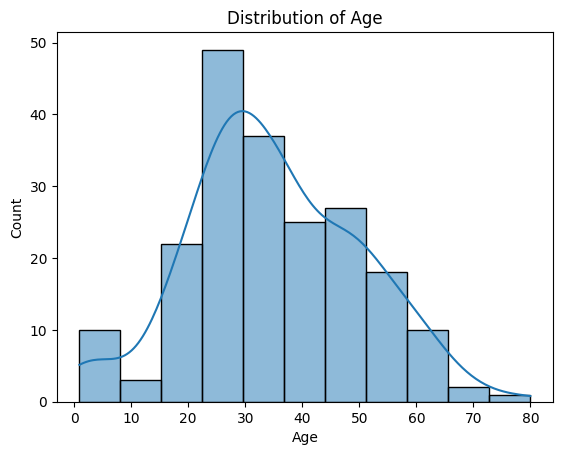

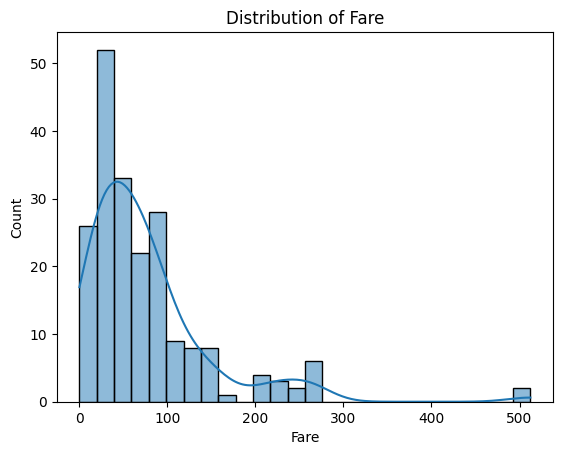

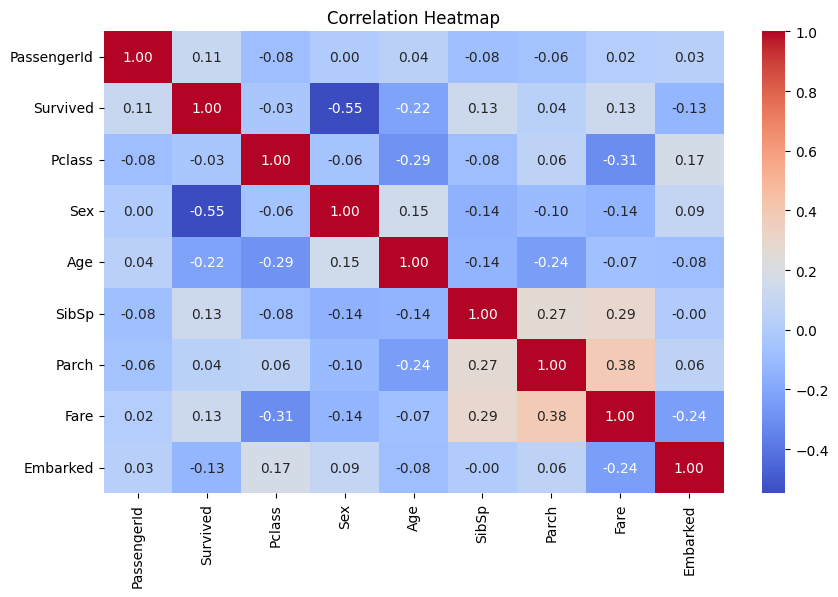

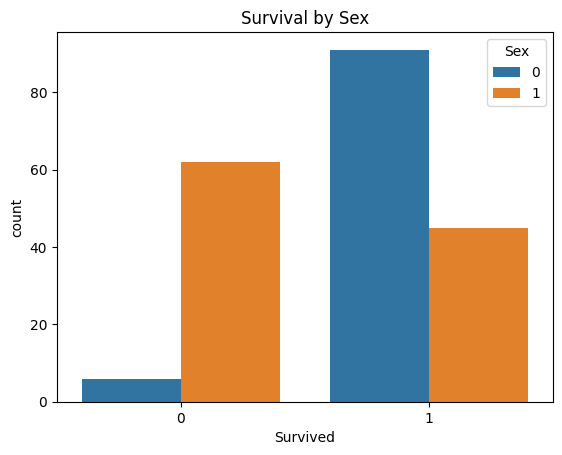

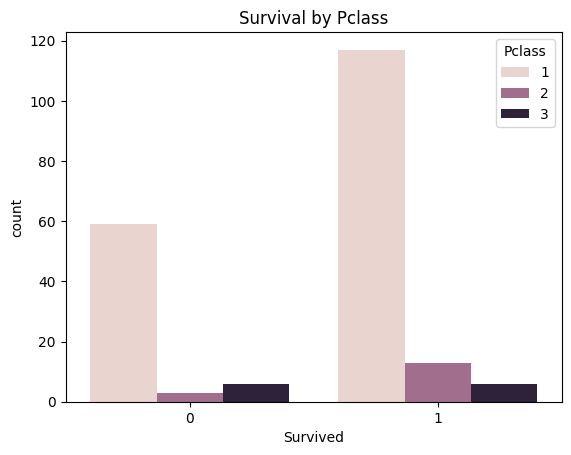

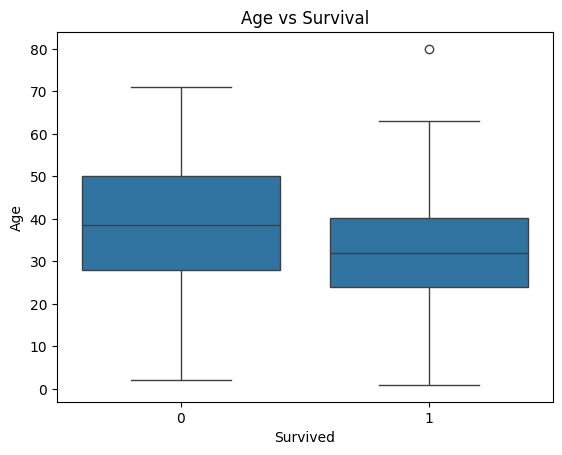

Survival rate by Pclass:
 Pclass
1    0.664773
2    0.812500
3    0.500000
Name: Survived, dtype: float64
Survival rate by Sex:
 Sex
0    0.938144
1    0.420561
Name: Survived, dtype: float64
Survival rate by Embarked:
 Embarked
0    0.753623
1    0.500000
2    0.625954
Name: Survived, dtype: float64


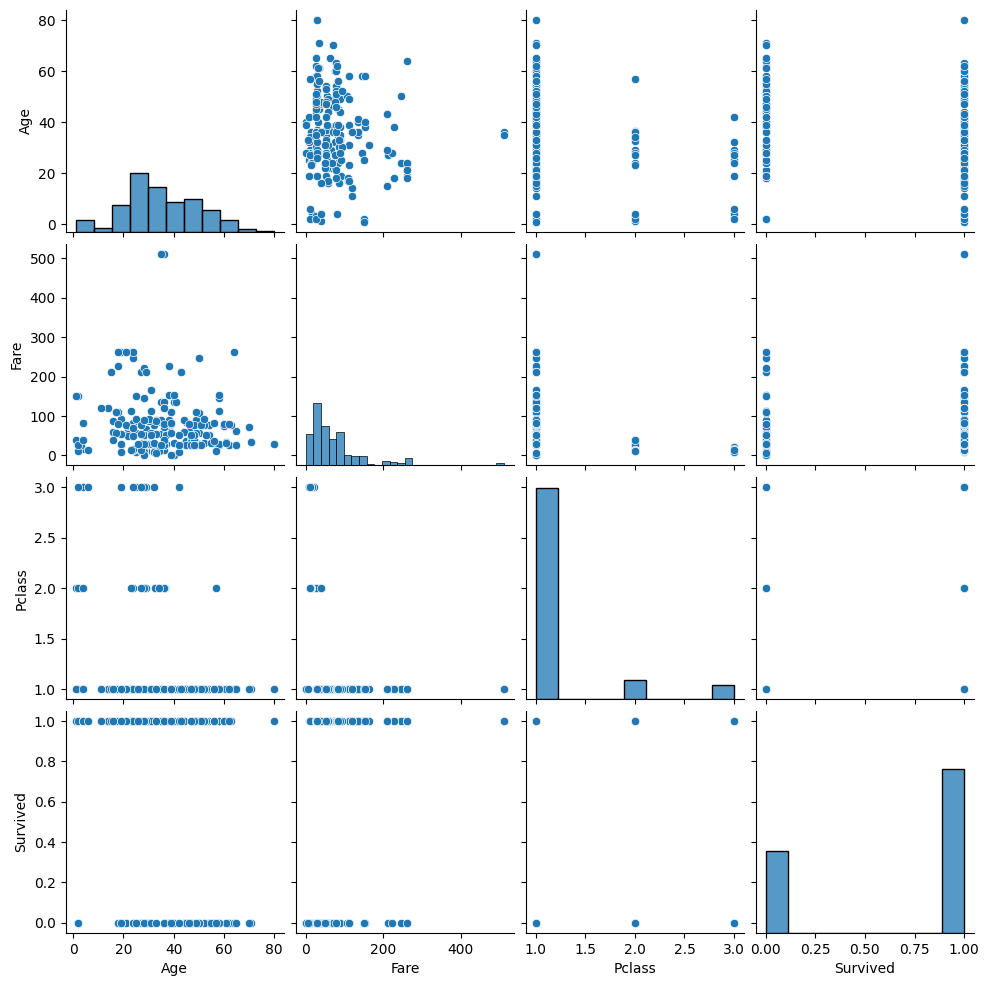

Title
Mr              93
Miss            47
Mrs             44
Master           7
Dr               3
Major            2
Mlle             2
Mme              1
Lady             1
Sir              1
Col              1
Capt             1
the Countess     1
Name: count, dtype: int64
Survival rate by Title:
 Title
Capt            0.000000
Col             1.000000
Dr              0.666667
Lady            1.000000
Major           0.500000
Master          1.000000
Miss            0.936170
Mlle            1.000000
Mme             1.000000
Mr              0.365591
Mrs             0.931818
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload the Titanic dataset if not already uploaded
from google.colab import files
uploaded = files.upload()

# Load the Titanic dataset
data = pd.read_csv('train.csv')

# Step 2: Data Cleaning

# Check for missing values
print(data.isnull().sum())

# Filling missing 'Age' values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Filling missing 'Embarked' values with the mode (most frequent value)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop rows with missing 'Cabin' values (optional, based on your analysis)
data.dropna(subset=['Cabin'], inplace=True)

# Convert 'Sex' column to numerical values (Male = 1, Female = 0)
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# Convert 'Embarked' column to numerical values (C = 0, Q = 1, S = 2)
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Check for duplicate rows
data.drop_duplicates(inplace=True)

# Step 3: Extract Titles from the 'Name' column (this will not affect numeric columns)
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Step 4: Exploratory Data Analysis (EDA)

# Descriptive Statistics
print(data.describe())

# Distribution of Age
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of Fare
sns.histplot(data['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

# Correlation heatmap (Exclude non-numeric columns)
correlation = data.select_dtypes(include=[np.number]).corr()  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Relationship between Survived and Sex
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Sex')
plt.show()

# Relationship between Survived and Pclass
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival by Pclass')
plt.show()

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age vs Survival')
plt.show()

# Group by Pclass and find survival rate
pclass_survival = data.groupby('Pclass')['Survived'].mean()
print("Survival rate by Pclass:\n", pclass_survival)

# Group by Sex and find survival rate
sex_survival = data.groupby('Sex')['Survived'].mean()
print("Survival rate by Sex:\n", sex_survival)

# Group by Embarked and find survival rate
embarked_survival = data.groupby('Embarked')['Survived'].mean()
print("Survival rate by Embarked:\n", embarked_survival)

# Pairplot of numerical features
sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()

# Step 5: Additional Analysis (Optional)

# Check the most common titles
print(data['Title'].value_counts())

# Survival rate by Title
title_survival = data.groupby('Title')['Survived'].mean()
print("Survival rate by Title:\n", title_survival)
